In [1]:
import rpy2
import pandas as pd

%load_ext rpy2.ipython

In [2]:
# %%R
# install.packages("devtools")
# library(devtools)
# install_github("welch-lab/liger")

## Load Data

In [5]:
%%R

library(liger)

R[write to console]: Loading required package: cowplot

R[write to console]: Loading required package: Matrix

R[write to console]: Loading required package: patchwork

R[write to console]: 
Attaching package: ‘patchwork’


R[write to console]: The following object is masked from ‘package:cowplot’:

    align_plots




In [3]:
%%R

library(liger)
rna.met = createLiger(list(rna = "input/rna.h5", met = "input/mch.h5"))
rna.met <- normalize(rna.met)

  |======================================================================| 100%


In [4]:
%%R
rna.met <- selectGenes(rna.met,datasets.use=c(1))
rna.met <- scaleNotCenter(rna.met)
# rna.met@scale.data[[2]] <- max(rna.met@raw.data[[2]]) - t(as.matrix(rna.met@raw.data[[2]][rna.met@var.genes,]))

[1] "rna"
  |======================================================================| 100%
[1] "met"
  |======================================================================| 100%


In [5]:
%%R
rna.met

An object of class liger 
with 2 datasets and
 7796 total cells.

## Integration

In [6]:
%%R
rna.met = online_iNMF(rna.met, k = 20, miniBatch_size = 5000, max.epochs = 5)

Starting Online iNMF... 
  |======================================================================| 100%
Calculate metagene loadings... 


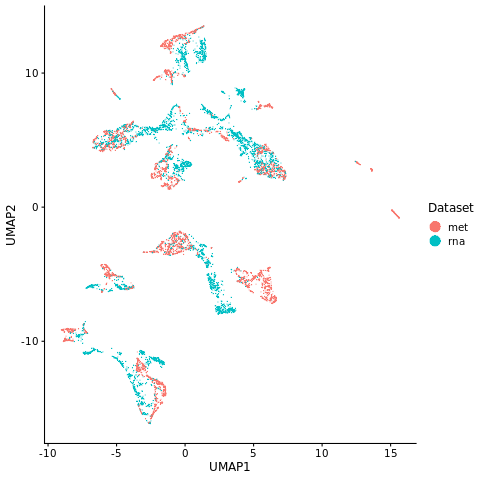

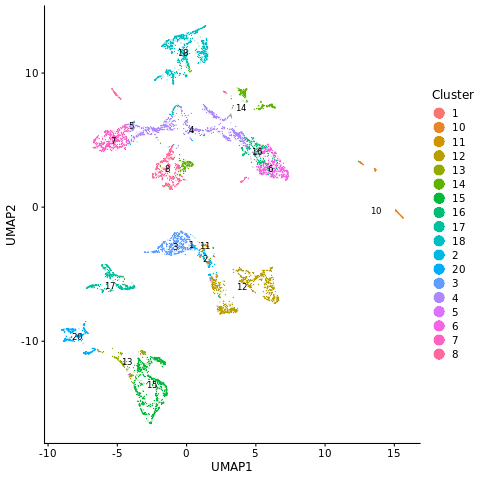

In [7]:
%%R
rna.met = quantile_norm(rna.met)
rna.met = runUMAP(rna.met)
plotByDatasetAndCluster(rna.met, axis.labels = c("UMAP1","UMAP2"))

In [8]:
%%R
calcAlignment(rna.met)

[1] 0.4612189


## Save
We used this matrix to calculate UMAP and co-clusters

In [17]:
%%R
write.table(rna.met@H.norm, file="LIGER.H.norm.txt", sep=',')

In [6]:
%%R
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/hanliu/miniconda3/envs/allcools/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] liger_0.5.0     patchwork_1.1.1 Matrix_1.3-2    cowplot_1.1.1  

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.6         ica_1.0-2          RColorBrewer_1.1-2 plyr_1.8.6        
 [5] pillar_1.4.7       compiler_4.0.3     hdf5r_1.3.3        iterators_1.0.13  
 [9] mclust